# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import json
#import datetime
from datetime import datetime

from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 611


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url =  "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + cities[i] + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url) # YOUR CODE HERE
        city_weather_json =  city_weather.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"] 
        city_lng = city_weather_json["coord"]["lon"] 
        city_max_temp = city_weather_json["main"]["temp_max"]  
        city_humidity = city_weather_json["main"]["humidity"]  
        city_clouds = city_weather_json["clouds"]["all"] 
        city_wind = city_weather_json["wind"]["speed"]  
        city_country = city_weather_json["sys"]["country"] 
        city_date = city_weather_json["dt"]  

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | utrik
Processing Record 2 of Set 1 | mwanza
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | saint-amand-montrond
Processing Record 6 of Set 1 | puerto carreno
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | columbus
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | flying fish cove
Processing Record 11 of Set 1 | san antonio de pale
Processing Record 12 of Set 1 | salekhard
Processing Record 13 of Set 1 | klyuchi
Processing Record 14 of Set 1 | machico
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | papao
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | tuineje
Processing Record 21 of Set 1 | ladispoli
Processing Record 22 of Set 1 | j

Processing Record 37 of Set 4 | antigonish
Processing Record 38 of Set 4 | cloverdale
Processing Record 39 of Set 4 | anadyr
Processing Record 40 of Set 4 | myrina
Processing Record 41 of Set 4 | talnakh
Processing Record 42 of Set 4 | zapala
Processing Record 43 of Set 4 | rocha
Processing Record 44 of Set 4 | borogontsy
Processing Record 45 of Set 4 | tralee
Processing Record 46 of Set 4 | comodoro rivadavia
Processing Record 47 of Set 4 | kaltan
Processing Record 48 of Set 4 | bengkulu
Processing Record 49 of Set 4 | pundong
Processing Record 0 of Set 5 | san felice circeo
Processing Record 1 of Set 5 | novaya igirma
Processing Record 2 of Set 5 | ponta delgada
Processing Record 3 of Set 5 | richards bay
Processing Record 4 of Set 5 | pitimbu
Processing Record 5 of Set 5 | puerto ayora
Processing Record 6 of Set 5 | praia
Processing Record 7 of Set 5 | vilyuchinsk
Processing Record 8 of Set 5 | atasu
Processing Record 9 of Set 5 | san fernando
Processing Record 10 of Set 5 | port ma

Processing Record 27 of Set 8 | mont-laurier
Processing Record 28 of Set 8 | dahab
Processing Record 29 of Set 8 | isangel
Processing Record 30 of Set 8 | buarcos
Processing Record 31 of Set 8 | kapa'a
Processing Record 32 of Set 8 | antofagasta
Processing Record 33 of Set 8 | waajid
Processing Record 34 of Set 8 | kalmunai
Processing Record 35 of Set 8 | rongelap
Processing Record 36 of Set 8 | taoudenni
Processing Record 37 of Set 8 | kismayo
Processing Record 38 of Set 8 | chipinge
Processing Record 39 of Set 8 | kununurra
Processing Record 40 of Set 8 | yasnyy
Processing Record 41 of Set 8 | demba
Processing Record 42 of Set 8 | rondonopolis
Processing Record 43 of Set 8 | olyokminsk
Processing Record 44 of Set 8 | kindu
Processing Record 45 of Set 8 | tanout
Processing Record 46 of Set 8 | damongo
City not found. Skipping...
Processing Record 47 of Set 8 | kataysk
Processing Record 48 of Set 8 | novyy urgal
Processing Record 49 of Set 8 | afaahiti
Processing Record 0 of Set 9 | ma

Processing Record 21 of Set 12 | las khorey
Processing Record 22 of Set 12 | luganville
Processing Record 23 of Set 12 | khilok
Processing Record 24 of Set 12 | motygino
Processing Record 25 of Set 12 | minas de marcona
Processing Record 26 of Set 12 | birjand
Processing Record 27 of Set 12 | ta`u
Processing Record 28 of Set 12 | campina verde
Processing Record 29 of Set 12 | miramichi
Processing Record 30 of Set 12 | kangding
Processing Record 31 of Set 12 | iranshahr
Processing Record 32 of Set 12 | sterling
Processing Record 33 of Set 12 | mandalgovi
Processing Record 34 of Set 12 | 'ain el melh
Processing Record 35 of Set 12 | ahau
City not found. Skipping...
Processing Record 36 of Set 12 | la passe
Processing Record 37 of Set 12 | annau
Processing Record 38 of Set 12 | souillac
Processing Record 39 of Set 12 | la gi
Processing Record 40 of Set 12 | tura
Processing Record 41 of Set 12 | ijuw
City not found. Skipping...
Processing Record 42 of Set 12 | saynshand
Processing Record 4

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame( city_data) 

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,utrik,11.2278,169.8474,27.65,71,74,9.10,MH,1700749536
1,mwanza,-2.5167,32.9000,26.39,56,44,1.59,TZ,1700749536
2,isafjordur,66.0755,-23.1240,-1.98,64,40,3.60,IS,1700749536
3,albany,42.6001,-73.9662,5.76,77,49,0.89,US,1700749536
4,saint-amand-montrond,46.7500,2.5000,7.57,73,87,1.34,FR,1700749537


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utrik,11.2278,169.8474,27.65,71,74,9.10,MH,1700749536
1,mwanza,-2.5167,32.9000,26.39,56,44,1.59,TZ,1700749536
2,isafjordur,66.0755,-23.1240,-1.98,64,40,3.60,IS,1700749536
3,albany,42.6001,-73.9662,5.76,77,49,0.89,US,1700749536
4,saint-amand-montrond,46.7500,2.5000,7.57,73,87,1.34,FR,1700749537


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

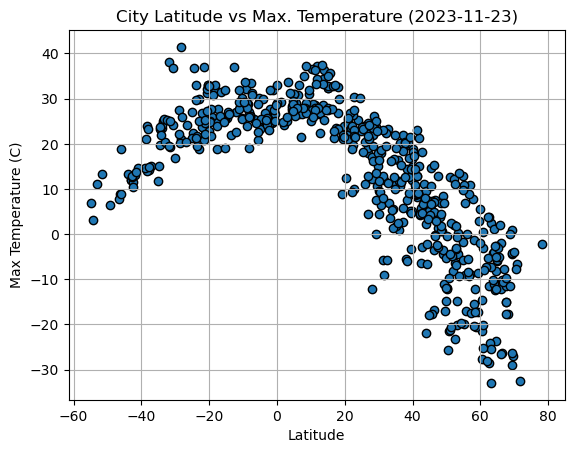

In [8]:
# Build scatter plot for latitude vs. temperature
fig1 = plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o",edgecolors="black")   

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)") # YOUR CODE HERE
plt.xlabel("Latitude")

date_time = datetime.fromtimestamp(city_data_df.iloc[0]["Date"])
date = str(date_time.date())
plt.title("City Latitude vs Max. Temperature (" + date + ")")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

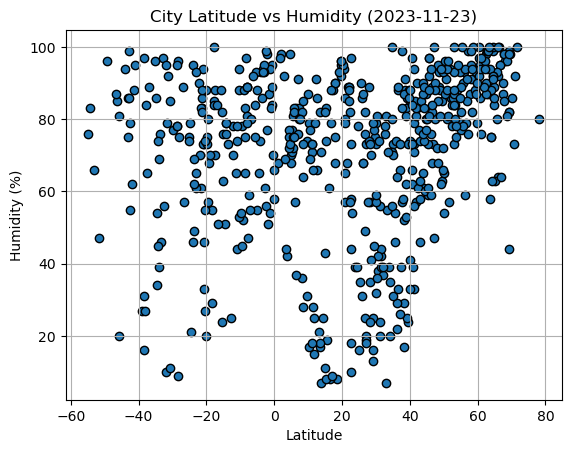

In [9]:
# Build the scatter plots for latitude vs. humidity
fig2 = plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o",edgecolors="black")  #YOUR CODE HERE

# Incorporate the other graph properties

plt.ylabel("Humidity (%)")  
plt.xlabel("Latitude")
plt.title("City Latitude vs Humidity (" + date + ")")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

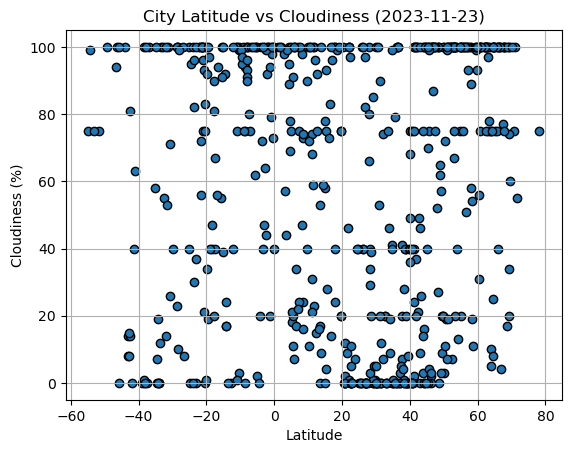

In [10]:
# Build the scatter plots for latitude vs. cloudiness
 
fig3 = plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")  
plt.xlabel("Latitude")
plt.title("City Latitude vs Cloudiness (" + date + ")")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

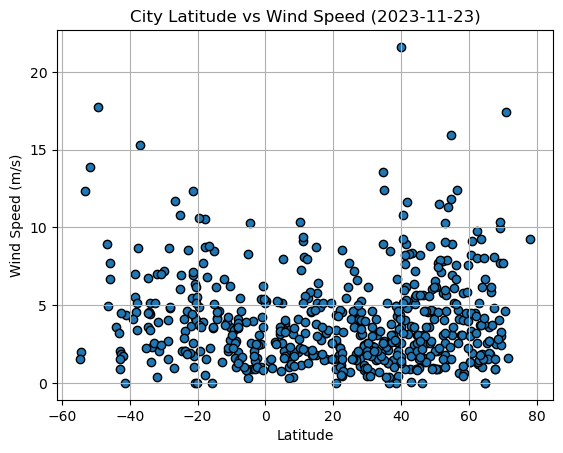

In [11]:
# Build the scatter plots for latitude vs. wind speed
 
fig4 = plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Wind Speed (m/s)")  
plt.xlabel("Latitude")
plt.title("City Latitude vs Wind Speed (" + date + ")")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def linear_regression_plots(xvals,yvals,xy,label):

    (slope,intercept,r_value,p_value,stderr) = linregress(xvals,yvals)
    regress_values = xvals * slope + intercept
   
    print(f"The r value is: {r_value}")
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
   
    plt.scatter(xvals,yvals,marker="o",edgecolors="black")
    plt.plot(xvals,regress_values,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")

    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utrik,11.2278,169.8474,27.65,71,74,9.10,MH,1700749536
2,isafjordur,66.0755,-23.1240,-1.98,64,40,3.60,IS,1700749536
3,albany,42.6001,-73.9662,5.76,77,49,0.89,US,1700749536
4,saint-amand-montrond,46.7500,2.5000,7.57,73,87,1.34,FR,1700749537
5,puerto carreno,6.1890,-67.4859,30.88,57,100,3.52,CO,1700749537


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df[(city_data_df["Lat"]<0) == True]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mwanza,-2.5167,32.9000,26.39,56,44,1.59,TZ,1700749536
6,carnarvon,-24.8667,113.6333,22.48,79,0,6.97,AU,1700749537
8,margaret river,-33.9500,115.0667,23.52,39,0,4.43,AU,1700749537
9,flying fish cove,-10.4217,105.6791,25.82,94,100,3.60,CX,1700749537
10,san antonio de pale,-1.4014,5.6325,24.61,87,100,2.53,GQ,1700749537


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8505317369854007


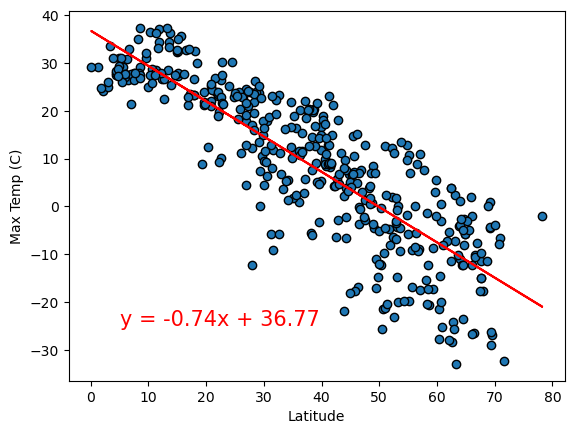

In [15]:
# Linear regression on Northern Hemisphere
linear_regression_plots(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],(5,-25),"Max Temp (C)")


The r value is: 0.6532082789481347


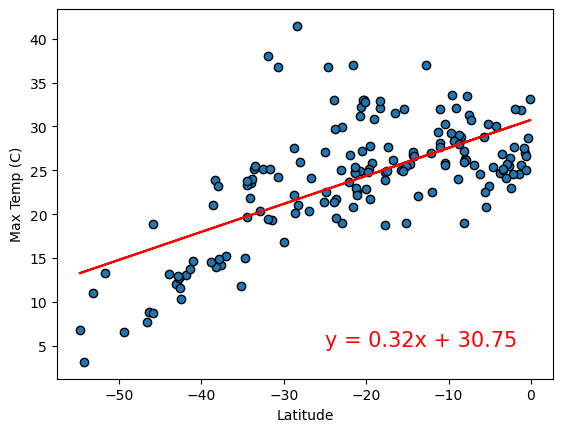

In [16]:
# Linear regression on Southern Hemisphere
linear_regression_plots(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],(-25,5),"Max Temp (C)")

**Discussion about the linear relationship:The r value for the northern hemisphere is -0.85 and for the southern hemisphere is  0.65. 
Therefore the R^2 values for both are 0.72 and 0.42 respectively.
This means that there is a strong correlation between latitude and and Max temp in the northern hemisphere with 72% of the variation in max temp being described by latitude. 
For the southern hemisphere the correlation is much weaker with only 42% of the variation being explained by latitude.This is possibly due to the fact that in the southern hemisphere there is a much smaller range of of latitudes as there is less land and more ocean. Therefore outliers will affect the regression by a greater degree.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.3960045399990442


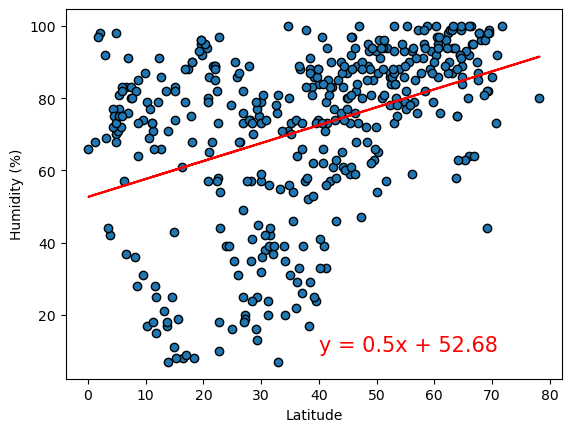

In [23]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],(40,10),"Humidity (%)")

The r value is: 0.12784155010324938


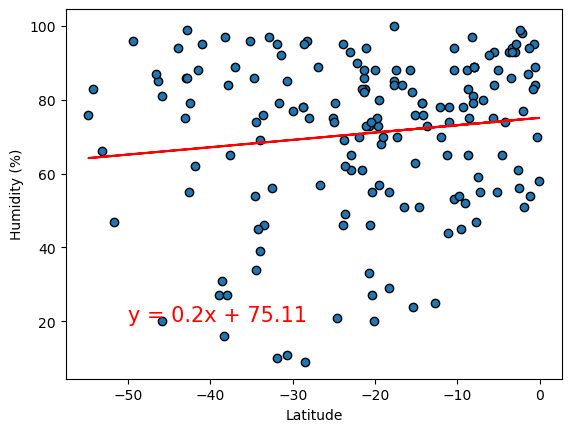

In [24]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],(-50,20),"Humidity (%)")

**Discussion about the linear relationship:The r value for the northern hemisphere is  0.396 and for the southern hemisphere is  0.128. 
Therefore the R^2 values for both are 0.156 and 0.016 respectively.
This means that there is a weak correlation between latitude and and humidity, with the correlation being slightly stronger (15.6%) in the northern hemisphere. In the Southern Hemisphere there is almost no correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.21917314724647854


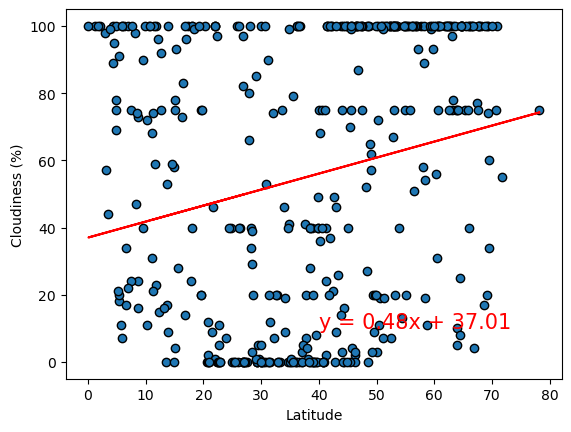

In [25]:
# Northern Hemisphere

linear_regression_plots(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],(40,10),"Cloudiness (%)")

The r value is: 0.2250455385812812


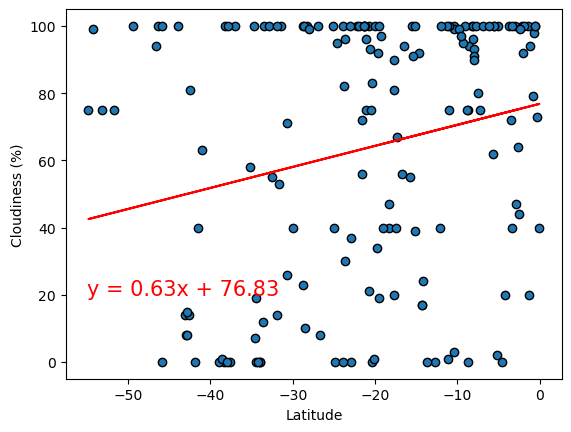

In [26]:
# Southern Hemisphere

linear_regression_plots(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],(-55,20),"Cloudiness (%)")

**Discussion about the linear relationship:The r value for the northern hemisphere is 0.220 and for the southern hemisphere is  0.225. 
Therefore the R^2 values for both are 0.048 and 0.051 respectively.
This means that there is a very weak correlation between latitude and cloudiness in both hemispheres with only approx. 5% of the variation in cloudiness explained by latitude in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.16564289326626155


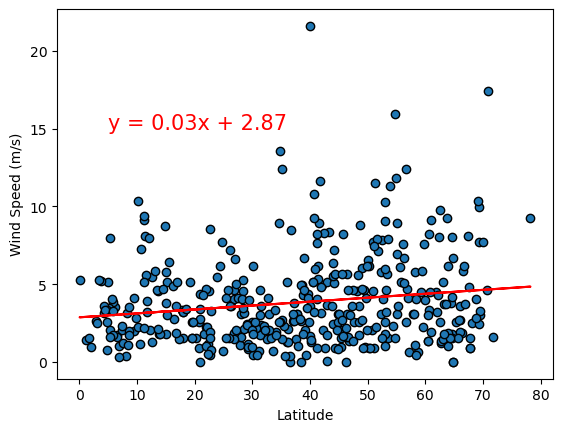

In [27]:
# Northern Hemisphere

linear_regression_plots(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],(5,15),"Wind Speed (m/s)")

The r value is: -0.2774663475442797


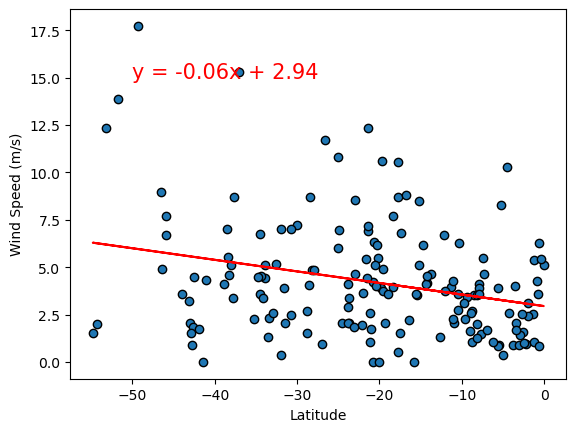

In [28]:
# Southern Hemisphere

linear_regression_plots(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],(-50,15),"Wind Speed (m/s)")

**Discussion about the linear relationship:The r value for the Northern Hemisphere is 0.166 and for the Southern Hemisphere is  -0.278. 
Therefore the R^2 values for both are 0.028 and 0.077 respectively.
This means that there is a very weak correlation between latitude and and wind speed in both hemispheres. The correlation in the southern hemisphere is slightly stronger (approx. 8% of the variation in wind speed is explained by latitude) than the northern hemisphere (aprox. 3%).